<a href="https://colab.research.google.com/github/ArchanaGajendra/Machine_Learning/blob/main/Multiregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df_house['area']  # Independent variable (area)
y = df_house['price'] # Dependent variable (price)

# Reshape X to a 2D array as required by sklearn
X = X.values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#### Data Acquistion and About Dataset
df_house = pd.read_csv('/content/Housing.csv')
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print('No. of Records:',df_house.shape[0])
print('No. of Features:',df_house.shape[1])
print('Features:', df_house.columns)

No. of Records: 545
No. of Features: 13
Features: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#### Data Preprocessing
##### Encoding of Categorical features
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for i in range(len(cat_var)):
  print(cat_var[i], df_house[cat_var[i]].nunique(), df_house[cat_var[i]].unique())

mainroad 2 ['yes' 'no']
guestroom 2 ['no' 'yes']
basement 2 ['no' 'yes']
hotwaterheating 2 ['no' 'yes']
airconditioning 2 ['yes' 'no']
prefarea 2 ['yes' 'no']
furnishingstatus 3 ['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
# Mapping of Binary String Object to int
var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
  return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df_house[var] = df_house[var].apply(binary_map)
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Encoding of categorical feature 'furnishingstatus'
# Creating dummy variables
status = pd.get_dummies(df_house['furnishingstatus'], drop_first = True) # Adding the results to the original housing dataframe
df_house = pd.concat([df_house, status], axis = 1)

df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,False,False


In [ ]:
# Drop the 'furnishingstatus' feature
df_house.drop(['furnishingstatus'], axis = 1, inplace = True)
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,False,False


In [ ]:
df_house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#Checking for missing values
df_house.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
print(X.dtypes)

const                  float64
area                     int64
bedrooms                 int64
bathrooms                int64
stories                  int64
parking                  int64
semi-furnished            bool
unfurnished               bool
mainroad_yes           float64
guestroom_yes          float64
basement_yes           float64
hotwaterheating_yes    float64
airconditioning_yes    float64
prefarea_yes           float64
dtype: object


In [ ]:
#### Regression using OLS method
X = df_house.iloc[:,1:]
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)
y = df_house.iloc[:,0]
X = sm.add_constant(X)

model = sm.OLS(y, X)
ols = model.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          9.07e-123
Time:                        10:45:35   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                  244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms             1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms            9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories              4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking              2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
semi-furnished      -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
unfurnished         -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
mainroad_yes         4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes        3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes         3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes  8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes   8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes         6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#### SGD Regression
#### Splitting Train and Test Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)
 # Size of the Train and Test dataset
print('Train Set:',X_train.shape[0])
print('Test Set',X_test.shape[0])

Train Set: 436
Test Set 109


In [ ]:
#### Model Building # Model Fitting
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [ ]:
# Print the intercept and coefficients
print('Intercept = ',sgd.intercept_)
print('Coefficient = ',sgd.coef_)

Intercept =  [2.05845512e+10]
Coefficient =  [ 2.05254587e+10  9.19029712e+11  2.35758120e+11 -1.55476880e+10
 -4.53306549e+10 -7.53119276e+10  1.64448211e+11 -1.60665032e+10
 -1.81452553e+10  5.45443363e+10  4.05132836e+10  9.93048438e+09
  2.43788053e+10  2.26440433e+09]


In [ ]:
#### Prediction of Test Dataset
y_pred = sgd.predict(X_test)
# Print the predicted values
print("Prediction for test set:",y_pred)

Prediction for test set: [5.42308682e+15 5.97428292e+15 3.71347809e+15 4.59596142e+15
 3.64002702e+15 6.17653296e+15 7.83067626e+15 4.58689983e+15
 2.97807118e+15 2.48206773e+15 7.88605343e+15 3.61588042e+15
 3.41925059e+15 2.84983924e+15 3.64919643e+15 3.33672741e+15
 1.83861214e+15 5.51473530e+15 5.37689698e+15 5.51477632e+15
 4.61407310e+15 6.27333329e+15 3.35395696e+15 3.49294288e+15
 7.58264351e+15 9.15420102e+15 2.84031440e+15 2.75779268e+15
 1.21317328e+16 2.75747741e+15 3.67695894e+15 2.86790535e+15
 5.51482035e+15 6.08017002e+15 4.38921060e+15 4.22825867e+15
 4.27054495e+15 2.92342310e+15 3.19891922e+15 2.56218005e+15
 7.33454029e+15 3.33651977e+15 5.90076055e+15 3.86047351e+15
 6.20404861e+15 5.40885646e+15 5.51488492e+15 4.26524679e+15
 7.39860672e+15 2.75739656e+15 6.87012261e+15 2.75743136e+15
 7.14121915e+15 4.13650522e+15 3.34615239e+15 2.67506397e+15
 5.28492847e+15 2.20627927e+15 5.92876588e+15 3.49273044e+15
 2.92298688e+15 1.96273900e+15 5.91894784e+15 4.55886980e+15

In [ ]:
#### Evaluation of the Model
mse = mean_squared_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ',mse)
print('R Squared = ', r_squared)

Mean Squared Error =  2.576057529313045e+31
R Squared =  -5.09649169712955e+18


Text(0, 0.5, 'Predicted')

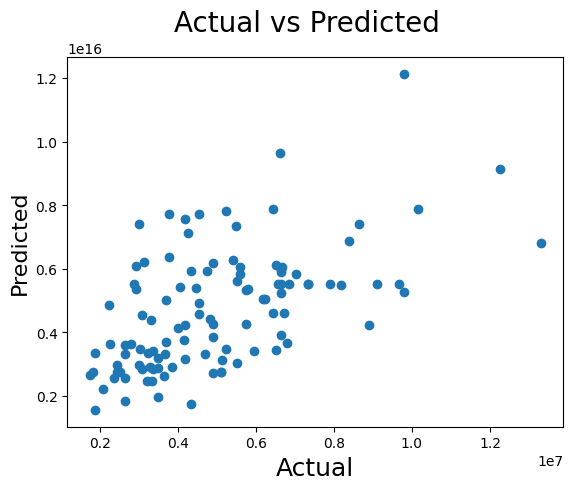

In [ ]:
#### Visualization of Error
# Plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predicted', fontsize=16)

In [ ]:
#### Prediction for a New Unseen Record
new_rec = [[8000, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0]]
print('Predicted Sales is:')
sgd.predict(new_rec)

Predicted Sales is:


array([1.68411373e+14])